In [1]:
import tsvalidation as tsv
from tsvalidation.data_generation import time_series_functions as tsf
from tsvalidation.data_generation import time_series_generation as tsg
from tsvalidation.data_generation import utils as dgu
import numpy as np
import matplotlib.pyplot as plt


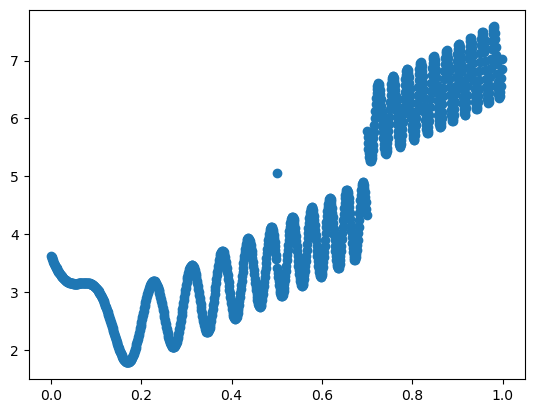

In [12]:
if __name__=='__main__':
    max_interval_size = 1
    samples = 1000

    ts_linear = tsg.generate_from_func(samples, tsf.linear_ts, param_possibilities= {'max_interval_size': (1, 2), 'slope':[5, 30], 'intercept': [0,10] }, nb_ts = 1)
    ts_exponential = tsg.generate_from_func(samples, tsf.exponential_ts,  param_possibilities = {'max_interval_size': (1, 2), 
                    'decay_rate': [1, 25], 
                    'initial_value': [1, 25]}, nb_ts = 2)
    ts_impulse = tsg.generate_from_func(samples, tsf.scaled_unit_impulse_function_ts, param_possibilities = {'idx': (500, 600), 
                                                'constant': [5, 10]}, nb_ts = 2)
    
    ts_indicator = tsg.generate_from_func(samples, tsf.scaled_right_indicator_ts, param_possibilities = {'idx': (700, 600), 
                                                'constant': [5, 10]}, nb_ts = 1)
    
    
    
    ts_sin= tsg.generate_from_func(samples, tsf.frequency_varying_sinusoid_ts, param_possibilities = {
        'max_interval_size': (1, 2), 'amplitude':[1,3],
        'frequency':(dgu.FrequencyModulationLinear(1,20), dgu.FrequencyModulationWithStep(10,0.8))}, nb_ts = 1)

    time_series = tsg.linear_combination([0.2, 0.05, 0.05, 0.1, 0.1, 0.2, 0.3], ts_linear + ts_exponential + ts_impulse + ts_indicator +ts_sin)
    
    
    
    # Plot
    plt.scatter(np.arange(0, max_interval_size, max_interval_size/samples), time_series)
    plt.show()

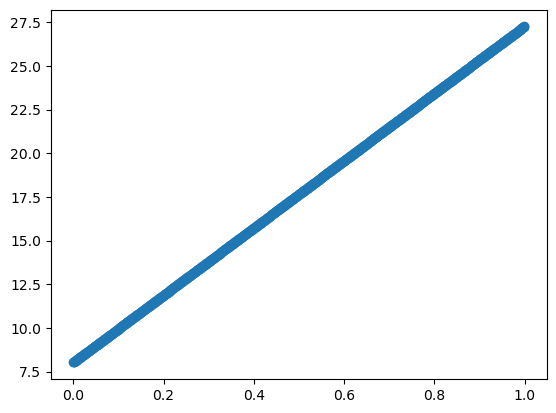

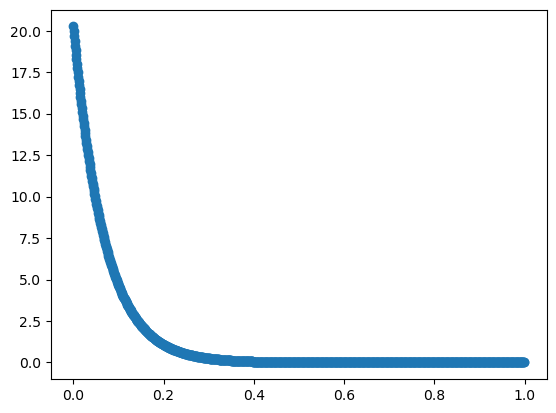

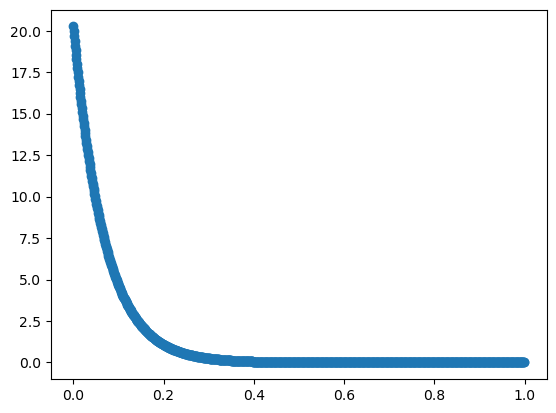

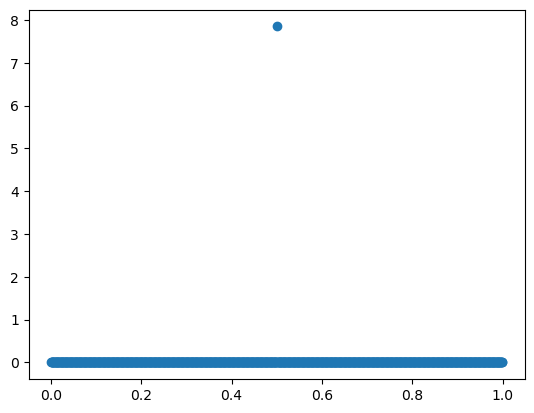

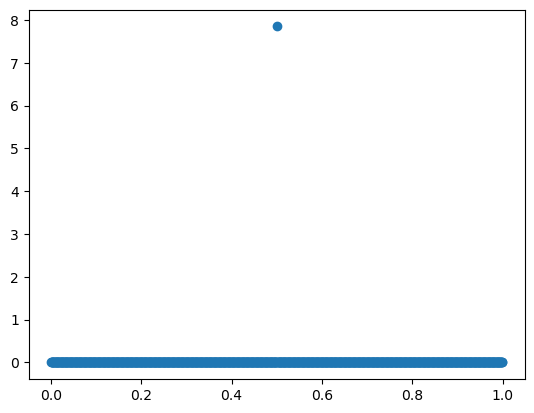

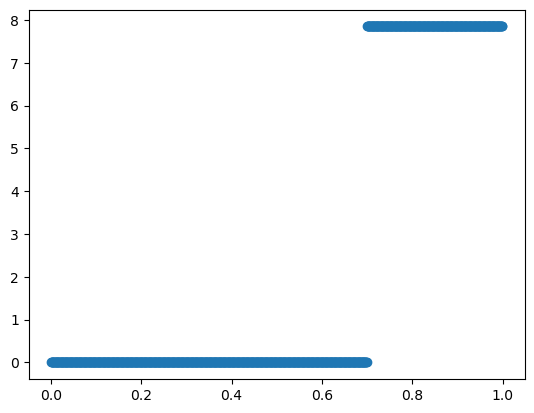

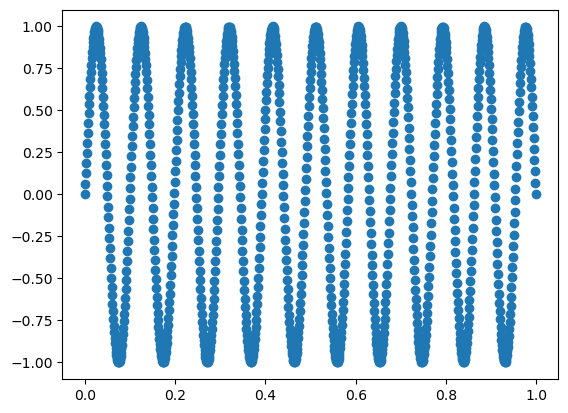

In [3]:
# Plot
for ts in ts_linear + ts_exponential + ts_impulse + ts_indicator +ts_sin:
    plt.scatter(np.arange(0, max_interval_size, max_interval_size/samples), ts)
    plt.show()

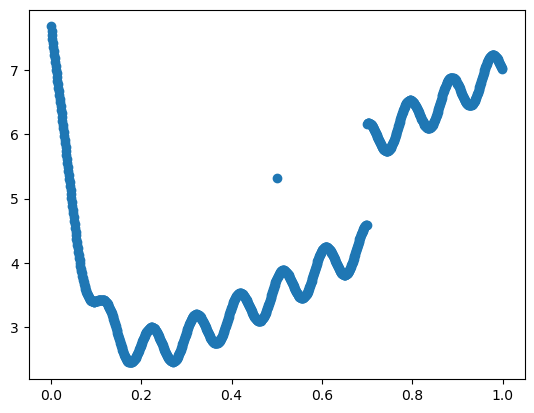

In [4]:
plt.scatter(np.arange(0, max_interval_size, max_interval_size/samples), time_series)
plt.show()

In [53]:
def markov_iteration(n):
    # start Markov
    d = np.zeros(n, dtype=int)
    
    i, j = 1, -1
    if np.random.rand() < 0.25:
        d[0], d[1] = i, i+1
    elif np.random.rand() < 0.5:
        d[0], d[1] = i, j-1
    elif np.random.rand() < 0.75:
        d[0], d[1] = j-1, i
    else:
        d[0], d[1] = j-1, j-1
    
    for t in range(2, n):
        rd = np.random.rand()
        if (d[t-1] > 0) and (d[t-2] > 0):
            d[t] = j
            j -=1
        elif (d[t-1] < 0) and (d[t-2] < 0):
            d[t] = i
            i +=1
        elif rd > 0.5:
            d[t] = j
            j -=1
        else:
            d[t] = i
            i +=1
           
    
    print(f'd: {d}') ## end Markov
    
    return d


In [58]:
def M_CV(S, p):
    n = len(S)
    
    # define m
    if p % 3 == 0:
        m = int(2 * p / 3) + 1
    else:
        m = int(2 * p / 3) + 2

    print(f'm: {m}')
    
    d = markov_iteration(n)
    
    Id = np.mod(d, m) + 1 + np.where(d > 0, 1, 0) * m
    
    Su = {}
    for u in range(1, 2 * m + 1):
        Su[u] = np.where(Id == u)[0]

    Sou = {}
    Soe = {}
    for u in range(1, 2 * m + 1):
        Sou[u] = Su[u][Su[u] % 2 != 0]
        Soe[u] = Su[u][Su[u] % 2 == 0]
    
    return Sou, Soe

M_CV(np.random(5,10,100), p=2)


TypeError: 'module' object is not callable

In [59]:
M_CV(np.random.rand(100), p=5)

m: 5
d: [  1  -2  -1   1   2  -2   3   4  -3   5  -4  -5   6  -6   7   8  -7  -8
   9  10  -9  11 -10  12  13 -11  14 -12 -13  15  16 -14  17  18 -15 -16
  19 -17  20 -18 -19  21 -20 -21  22  23 -22 -23  24  25 -24  26 -25 -26
  27 -27 -28  28  29 -29  30  31 -30 -31  32  33 -32  34  35 -33  36  37
 -34  38 -35  39 -36  40 -37  41 -38 -39  42 -40  43  44 -41  45 -42 -43
  46 -44 -45  47  48 -46 -47  49  50 -48]


({1: array([11, 83], dtype=int64),
  2: array([31, 59, 81, 91], dtype=int64),
  3: array([17, 39, 47, 69, 89, 99], dtype=int64),
  4: array([ 1,  5, 27, 37, 55], dtype=int64),
  5: array([13, 25, 35, 43, 53, 63, 95], dtype=int64),
  6: array([ 9, 19, 29, 49, 77, 87], dtype=int64),
  7: array([ 3, 21, 41, 51, 61, 79], dtype=int64),
  8: array([23, 71, 93], dtype=int64),
  9: array([15, 33, 45, 57, 65, 73], dtype=int64),
  10: array([ 7, 67, 75, 85, 97], dtype=int64)},
 {1: array([22, 34, 42, 52, 62, 74, 92], dtype=int64),
  2: array([10, 20, 40, 50, 72], dtype=int64),
  3: array([ 8, 28, 56, 80], dtype=int64),
  4: array([16, 46, 66, 78, 88, 96], dtype=int64),
  5: array([ 2, 76, 86], dtype=int64),
  6: array([38, 60, 68, 98], dtype=int64),
  7: array([ 0, 12, 30, 70, 90], dtype=int64),
  8: array([ 4, 14, 32, 44, 54, 64, 82], dtype=int64),
  9: array([ 6, 24, 84, 94], dtype=int64),
  10: array([18, 26, 36, 48, 58], dtype=int64)})